In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

## Loading the datasets 

In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")

## Exploring the data

In [4]:
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',100)

In [5]:
data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [6]:
data.shape

(39644, 61)

In [7]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [8]:
data.dtypes

url                                object
timedelta                         float64
n_tokens_title                    float64
n_tokens_content                  float64
n_unique_tokens                   float64
n_non_stop_words                  float64
n_non_stop_unique_tokens          float64
num_hrefs                         float64
num_self_hrefs                    float64
num_imgs                          float64
num_videos                        float64
average_token_length              float64
num_keywords                      float64
data_channel_is_lifestyle         float64
 data_channel_is_entertainment    float64
data_channel_is_bus               float64
data_channel_is_socmed            float64
data_channel_is_tech              float64
data_channel_is_world             float64
kw_min_min                        float64
kw_max_min                        float64
kw_avg_min                        float64
kw_min_max                        float64
kw_max_max                        

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

In [12]:
#Encoding the target variable by threshold 100
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(data.shares>=3395))

In [13]:
#Get features from the dataset
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]],axis=1)
features_raw.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


## Visualize the feature of different day of week


In [15]:
columns_day = features_raw.columns.values[29:36]
print(columns_day)
unpop = data[data['shares']<3395]
pop = data[data['shares']>=3395]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

['weekday_is_monday' 'weekday_is_tuesday' 'weekday_is_wednesday'
 'weekday_is_thursday' 'weekday_is_friday' 'weekday_is_saturday'
 'weekday_is_sunday']


In [18]:
unpop_day

array([5314., 6013., 6042., 5894., 4559., 1777., 1966.])

In [19]:
pop_day

array([1347., 1377., 1393., 1373., 1142.,  676.,  771.])

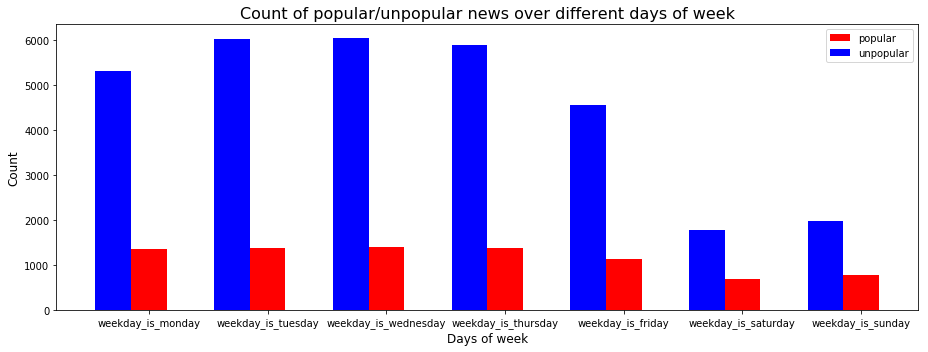

In [21]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different days of week",fontsize =16)
plt.bar(np.arange(len(columns_day)),pop_day,width = 0.3, align='center',color ='r',label = 'popular')
plt.bar(np.arange(len(columns_day)) - 0.3 ,unpop_day,width = 0.3, align='center',color ='b',label = 'unpopular')
plt.xticks(np.arange(len(columns_day)),columns_day)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Days of week",fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("days.pdf")
plt.show()

## Visualize the feature of different category

In [29]:
column_chans = features_raw.columns.values[11:17]
print(column_chans)
unpop_ch =unpop[column_chans].sum().values
pop_ch = pop[column_chans].sum().values

['data_channel_is_lifestyle' ' data_channel_is_entertainment'
 'data_channel_is_bus' 'data_channel_is_socmed' 'data_channel_is_tech'
 'data_channel_is_world']


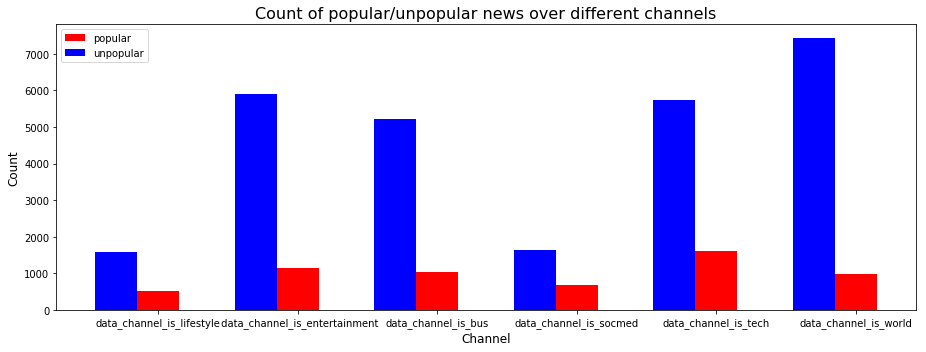

In [30]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different channels",fontsize =16)
plt.bar(np.arange(len(column_chans)),pop_ch,width = 0.3, align='center',color ='r',label = 'popular')
plt.bar(np.arange(len(column_chans)) - 0.3 ,unpop_ch,width = 0.3, align='center',color ='b',label = 'unpopular')
plt.xticks(np.arange(len(column_chans)),column_chans)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Channel",fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("channels.pdf")
plt.show()

## Normalize the numerical features

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos',
             'average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares',
             'self_reference_avg_sharess']
features_raw[numerical]= scaler.fit_transform(data[numerical])
features_raw.head(3)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000588,0.000588,0.000588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875
1,0.333333,0.030092,0.604743,1.0,0.791946,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000
2,0.333333,0.024900,0.575130,1.0,0.663866,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001089,0.001089,0.001089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000


## Doing the PCA for the raw features

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features,columns=['Dimension1','Dimension2'])
reduced_features_pop = reduced_features[data['shares']>=3395]
reduced_features_unpop = reduced_features[data['shares']<3395]

## Visualizing the above PCA

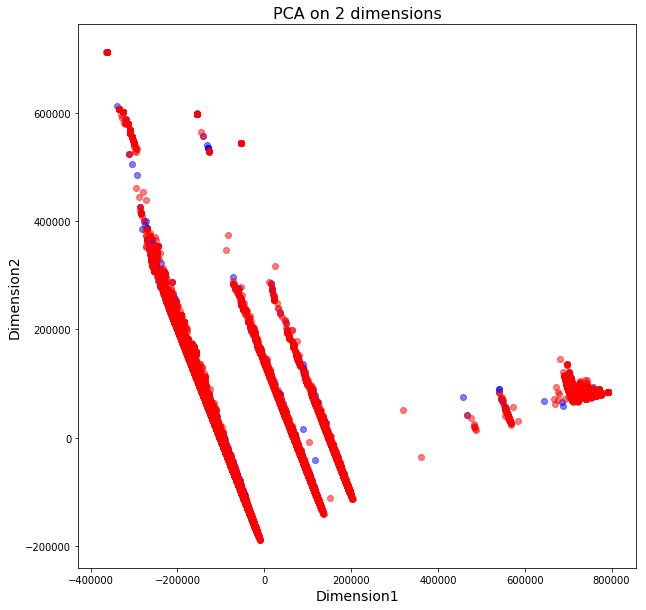

In [34]:
fig,ax = plt.subplots(figsize = (10,10))
ax.scatter(x= reduced_features_pop.loc[:,'Dimension1'],y= reduced_features_pop.loc[:,'Dimension2'],c = 'b',alpha=0.5)
ax.scatter(x= reduced_features_unpop.loc[:,'Dimension1'],y= reduced_features_unpop.loc[:,'Dimension2'],c = 'r',alpha=0.5)
ax.set_xlabel("Dimension1",fontsize=14)
ax.set_ylabel("Dimension2",fontsize=14)
ax.set_title("PCA on 2 dimensions",fontsize=16)
plt.savefig("pca2.jpg")
plt.show()

In [35]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2','Dimension 3'])
reduced_features_pop = reduced_features[data['shares']>=3395]
reduced_features_unpop = reduced_features[data['shares']<3395]

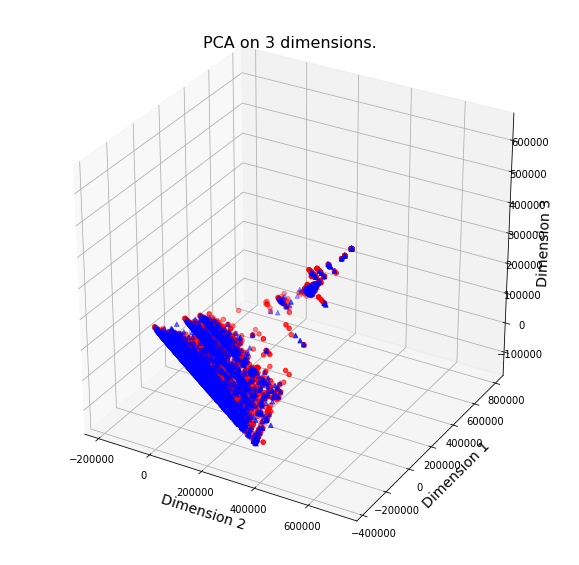

In [36]:
# 3D scatterplot of the reduced data 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( reduced_features_pop.loc[:, 'Dimension 2'],reduced_features_pop.loc[:, 'Dimension 1'],\
           reduced_features_pop.loc[:, 'Dimension 3'], c='b',marker='^')
ax.scatter(reduced_features_unpop.loc[:, 'Dimension 2'],reduced_features_unpop.loc[:, 'Dimension 1'],\
           reduced_features_unpop.loc[:, 'Dimension 3'], c='r')
ax.set_xlabel("Dimension 2", fontsize=14)
ax.set_ylabel("Dimension 1", fontsize=14)
ax.set_zlabel("Dimension 3", fontsize=14)
ax.set_title("PCA on 3 dimensions.", fontsize=16);
plt.savefig("pca3.jpg")
plt.show()

## Feature selection by RFECV

In [37]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [38]:
estimator_LR = LogisticRegression(random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(features_raw, popular_label)
selector_LR.ranking_

array([22, 50, 40, 47, 26, 53, 48, 37, 57, 25, 10, 54,  6,  7, 11, 42,  9,
       28, 32, 31, 49, 33, 45, 29, 30, 27, 46, 38, 41, 19, 15, 16, 17, 18,
       23, 21,  8, 55, 12,  3, 44, 52,  1, 36, 43, 51,  2,  1, 13,  4, 24,
        5, 14, 34, 39, 35, 20, 56])

## Plot the cv score vs number of features

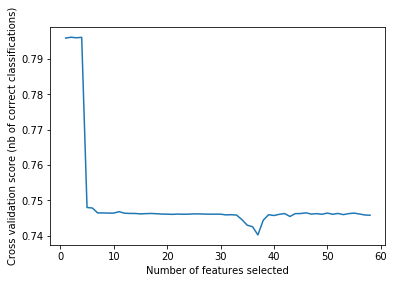

In [39]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
plt.savefig('RFE_LR.pdf')
plt.show()

In [40]:
print(features_raw.columns.values[selector_LR.ranking_==1].shape[0])
print(features_raw.columns.values[selector_LR.ranking_==1])
features_LR = features_raw[features_raw.columns.values[selector_LR.ranking_==1]]

2
['global_subjectivity' 'rate_negative_words']


In [42]:
features_LR.head()

,global_subjectivity,rate_negative_words
0,0.521617,0.230769
1,0.341246,0.266667
2,0.702222,0.142857
3,0.429850,0.333333
4,0.513502,0.139785


## Split data into training and testing sets

In [44]:
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.cross_validation import train_test_split

In [47]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, popular_label, test_size = 0.2, random_state = 0)

In [48]:
print ("Training set has {} samples.".format(X_train_LR.shape[0]))#35679 samples
print ("Testing set has {} samples.".format(X_test_LR.shape[0]))#3965 samples

Training set has 31715 samples.
Testing set has 7929 samples.


In [49]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    results['train_time'] = end-start    

    # Get predictions on the first 4000 training samples

    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time  

    # Calculate the total prediction time

    results['pred_time'] = end-start           

    # Compute accuracy on the first 4000 training samples

    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)        

    # Compute accuracy on test set

    results['acc_test'] = accuracy_score(y_test,predictions_test)

    # Compute F-score on the the first 4000 training samples

    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)        

    # Compute F-score on the test set

    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)

    # Compute AUC on the the first 4000 training samples

    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)

    # Compute AUC on the test set

    results['auc_test'] = roc_auc_score(y_test,predictions_test) 

    # Success

    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test'])   )

    # Return the results

    return results

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf_A = LogisticRegression(random_state=0,C=1.0)

In [52]:
# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_1 = int(X_train_LR.shape[0]*0.01)
samples_10 = int(X_train_LR.shape[0]*0.1)
samples_100 = X_train_LR.shape[0]

In [53]:
# Collect results on the learners

results = {}

for clf in [clf_A]:

    clf_name = clf.__class__.__name__

    results[clf_name] = {}

    for i, samples in enumerate([samples_1, samples_10, samples_100]):

            results[clf_name][i] = train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)


LogisticRegression trained on 317 samples.
LogisticRegression with accuracy 0.7969479127254383, F1 0.0 and AUC 0.5.
LogisticRegression trained on 3171 samples.
LogisticRegression with accuracy 0.7969479127254383, F1 0.0 and AUC 0.5.
LogisticRegression trained on 31715 samples.
LogisticRegression with accuracy 0.7969479127254383, F1 0.0 and AUC 0.5.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
